# Practice Exercise: Exploratory Data Analysis

## Context:

- The dataset is related to the Portuguese "Vinho Verde" wine.
- Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

- This datasets can be viewed as classification or regression tasks.
- The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).
- Outlier detection algorithms could be used to detect the few excellent or poor wines.
- Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


## Objective:

- The objective of this exercise is to analyse the characteristics of wine using statistical techniques (also known as Exploratory Data Analysis).

## Data Description:

Attribute Information: 

  - fixed acidity
  - volatile acidity
  - citric acid
  - residual sugar
  - chlorides
  - free sulfur dioxide
  - total sulfur dioxide
  - density
  - pH
  - sulphates
  - alcohol Output variable (based on sensory data)
  - quality (score between 0 and 10)

## 1. Import the libraries:

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stat

## 2. Importing the dataset:

In [102]:
df = pd.read_csv('wine_data.csv')
df = df.rename(columns={'fixed acidity':'fixacidity','volatile acidity':'volacidity','citric acid':'citricacid',
                        'residual sugar':'resisugar','free sulfur dioxide':'freeSo2','total sulfur dioxide':'totSo2'
                       })

In [56]:
df.head()

,fixacidity,volacidity,citricacid,resisugar,chlorides,freeSo2,totSo2,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 3. Check the information about data and data-types of each respective attributes:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixacidity    4898 non-null float64
volacidity    4898 non-null float64
citricacid    4898 non-null float64
resisugar     4898 non-null float64
chlorides     4898 non-null float64
freeSo2       4898 non-null float64
totSo2        4898 non-null float64
density       4898 non-null float64
pH            4898 non-null float64
sulphates     4898 non-null float64
alcohol       4898 non-null float64
quality       4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## 3.1 Check the number of null values.

In [17]:
df.isnull().sum()

fixacidity    0
volacidity    0
citricacid    0
resisugar     0
chlorides     0
freeSo2       0
totSo2        0
density       0
pH            0
sulphates     0
alcohol       0
quality       0
dtype: int64

## 4. EDA Descriptive Statistics:

### 4.1.  Measures of Central Tendency

Measures of Central Tendency define significant, representative and adequate values for a set of data, depending on what you want to analyze. They are the 

1. mean
2. median
3. quantiles and mode.

### 4.2 Check the  mean ,Mode, Median and Quantile for dataset?

#### Mean

In [18]:
df.mean()

fixacidity      6.854788
volacidity      0.278241
citricacid      0.334192
resisugar       6.391415
chlorides       0.045772
freeSo2        35.308085
totSo2        138.360657
density         0.994027
pH              3.188267
sulphates       0.489847
alcohol        10.514267
quality         5.877909
dtype: float64

#### Mode

In [24]:
df.mode()

,fixacidity,volacidity,citricacid,resisugar,chlorides,freeSo2,totSo2,density,pH,sulphates,alcohol,quality
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6


#### Median and Quantile

In [21]:
df.median()

fixacidity      6.80000
volacidity      0.26000
citricacid      0.32000
resisugar       5.20000
chlorides       0.04300
freeSo2        34.00000
totSo2        134.00000
density         0.99374
pH              3.18000
sulphates       0.47000
alcohol        10.40000
quality         6.00000
dtype: float64

### check (Quantile 25%,50%,75%) for dataset

#### Quantile 25%

In [57]:
df.quantile(0.25)

fixacidity      6.300000
volacidity      0.210000
citricacid      0.270000
resisugar       1.700000
chlorides       0.036000
freeSo2        23.000000
totSo2        108.000000
density         0.991723
pH              3.090000
sulphates       0.410000
alcohol         9.500000
quality         5.000000
Name: 0.25, dtype: float64


#### Quantile 50%

In [26]:
df.quantile(0.5)

fixacidity      6.80000
volacidity      0.26000
citricacid      0.32000
resisugar       5.20000
chlorides       0.04300
freeSo2        34.00000
totSo2        134.00000
density         0.99374
pH              3.18000
sulphates       0.47000
alcohol        10.40000
quality         6.00000
Name: 0.5, dtype: float64

#### Quantile 75%

In [58]:
df.quantile(0.75)

fixacidity      7.3000
volacidity      0.3200
citricacid      0.3900
resisugar       9.9000
chlorides       0.0500
freeSo2        46.0000
totSo2        167.0000
density         0.9961
pH              3.2800
sulphates       0.5500
alcohol        11.4000
quality         6.0000
Name: 0.75, dtype: float64

## 5. Check the data description:

In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixacidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volacidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citricacid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
resisugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
freeSo2,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
totSo2,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


## 6. Measures of Dispersion

Measures of Dispersion are measures that indicate how spread the data is, or how they vary. The measures of dispersion are range, variance, standard deviation and the absolute deviation, or mean absolute deviation.

### 6.1 check the Range,Variance,Standard Deviation,Absolute Deviation or Mean Absolute Deviation?

In [82]:
df.quantile(0.75) - df.quantile(0.25)

fixacidity     1.000000
volacidity     0.110000
citricacid     0.120000
resisugar      8.200000
chlorides      0.014000
freeSo2       23.000000
totSo2        59.000000
density        0.004377
pH             0.190000
sulphates      0.140000
alcohol        1.900000
quality        1.000000
dtype: float64

#### The above output represents the IQR values for all the attributes.

#### Range

In [85]:
df.apply(lambda x : (x.max() - x.min()))

fixacidity     10.40000
volacidity      1.02000
citricacid      1.66000
resisugar      65.20000
chlorides       0.33700
freeSo2       287.00000
totSo2        431.00000
density         0.05187
pH              1.10000
sulphates       0.86000
alcohol         6.20000
quality         6.00000
dtype: float64

#### The above output represents the difference between the highest and the lowest values for each individual attributes.

#### Variance

In [87]:
df.apply(lambda x : stat.tvar(x))

fixacidity       0.712114
volacidity       0.010160
citricacid       0.014646
resisugar       25.725770
chlorides        0.000477
freeSo2        289.242720
totSo2        1806.085491
density          0.000009
pH               0.022801
sulphates        0.013025
alcohol          1.514427
quality          0.784356
dtype: float64

#### The above output represents the data dispersion on the square scale.

#### Standard Deviation

In [89]:
df.apply(lambda x : stat.tstd(x))

fixacidity     0.843868
volacidity     0.100795
citricacid     0.121020
resisugar      5.072058
chlorides      0.021848
freeSo2       17.007137
totSo2        42.498065
density        0.002991
pH             0.151001
sulphates      0.114126
alcohol        1.230621
quality        0.885639
dtype: float64

#### The above output shows how much the data deviated from the mean.

## 7. Covariance and Correlation

1. Covariance is a numerical measure that indicates the inter-dependency between two variables. 
2. Covariance indicates how two variables behave together in relation to their averages. 
3. A covariance of 0 indicates that the variables are totally independant, while a high and positive covariance value means that a variable is big when the other is big. Analogously, a negative covariance with a high absolute value means that one variable is big when the other is small.
4. Covariance can be calculated through the cov() function. 

### 7.1 Check the Covariance and Correlation scores . write your Observations?

#### Covariance

In [90]:
df.cov()

,fixacidity,volacidity,citricacid,resisugar,chlorides,freeSo2,totSo2,density,pH,sulphates,alcohol,quality
fixacidity,0.712114,-0.001931,0.029533,0.381022,0.000426,-0.708919,3.266013,0.000670,-0.054265,-0.001651,-0.125533,-0.084947
volacidity,-0.001931,0.010160,-0.001823,0.032865,0.000155,-0.166300,0.382354,0.000008,-0.000486,-0.000411,0.008400,-0.017382
citricacid,0.029533,-0.001823,0.014646,0.057829,0.000302,0.193630,0.622989,0.000054,-0.002992,0.000861,-0.011278,-0.000987
resisugar,0.381022,0.032865,0.057829,25.725770,0.009828,25.800578,86.531303,0.012727,-0.148684,-0.015435,-2.812740,-0.438316
chlorides,0.000426,0.000155,0.000302,0.009828,0.000477,0.037674,0.184687,0.000017,-0.000298,0.000042,-0.009684,-0.004062
freeSo2,-0.708919,-0.166300,0.193630,25.800578,0.037674,289.242720,444.865891,0.014966,-0.001587,0.114938,-5.234509,0.122878
totSo2,3.266013,0.382354,0.622989,86.531303,0.184687,444.865891,1806.085491,0.067352,0.014894,0.652645,-23.476605,-6.576746
density,0.000670,0.000008,0.000054,0.012727,0.000017,0.014966,0.067352,0.000009,-0.000042,0.000025,-0.002871,-0.000814
pH,-0.054265,-0.000486,-0.002992,-0.148684,-0.000298,-0.001587,0.014894,-0.000042,0.022801,0.002688,0.022565,0.013297
sulphates,-0.001651,-0.000411,0.000861,-0.015435,0.000042,0.114938,0.652645,0.000025,0.002688,0.013025,-0.002448,0.005425


#### Observation:

- Hard to be understood and compared, because it gives us values in different scales as the variables change. 
- For a better comparison, we normalize covariance to a value that will always be between -1 and 1, so it can be better understood.

#### Correlation

In [91]:
df.corr()

,fixacidity,volacidity,citricacid,resisugar,chlorides,freeSo2,totSo2,density,pH,sulphates,alcohol,quality
fixacidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volacidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citricacid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
resisugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
freeSo2,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
totSo2,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


#### Observation:
    
1. This value is the correlation. Correlation is always between -1, a perfect anti-correlation, and 1, perfect correlation
2. Finally, it is also important to note the famous concept that says that “correlation does not imply causation”.

## 8. Pairplot for checking correlation:

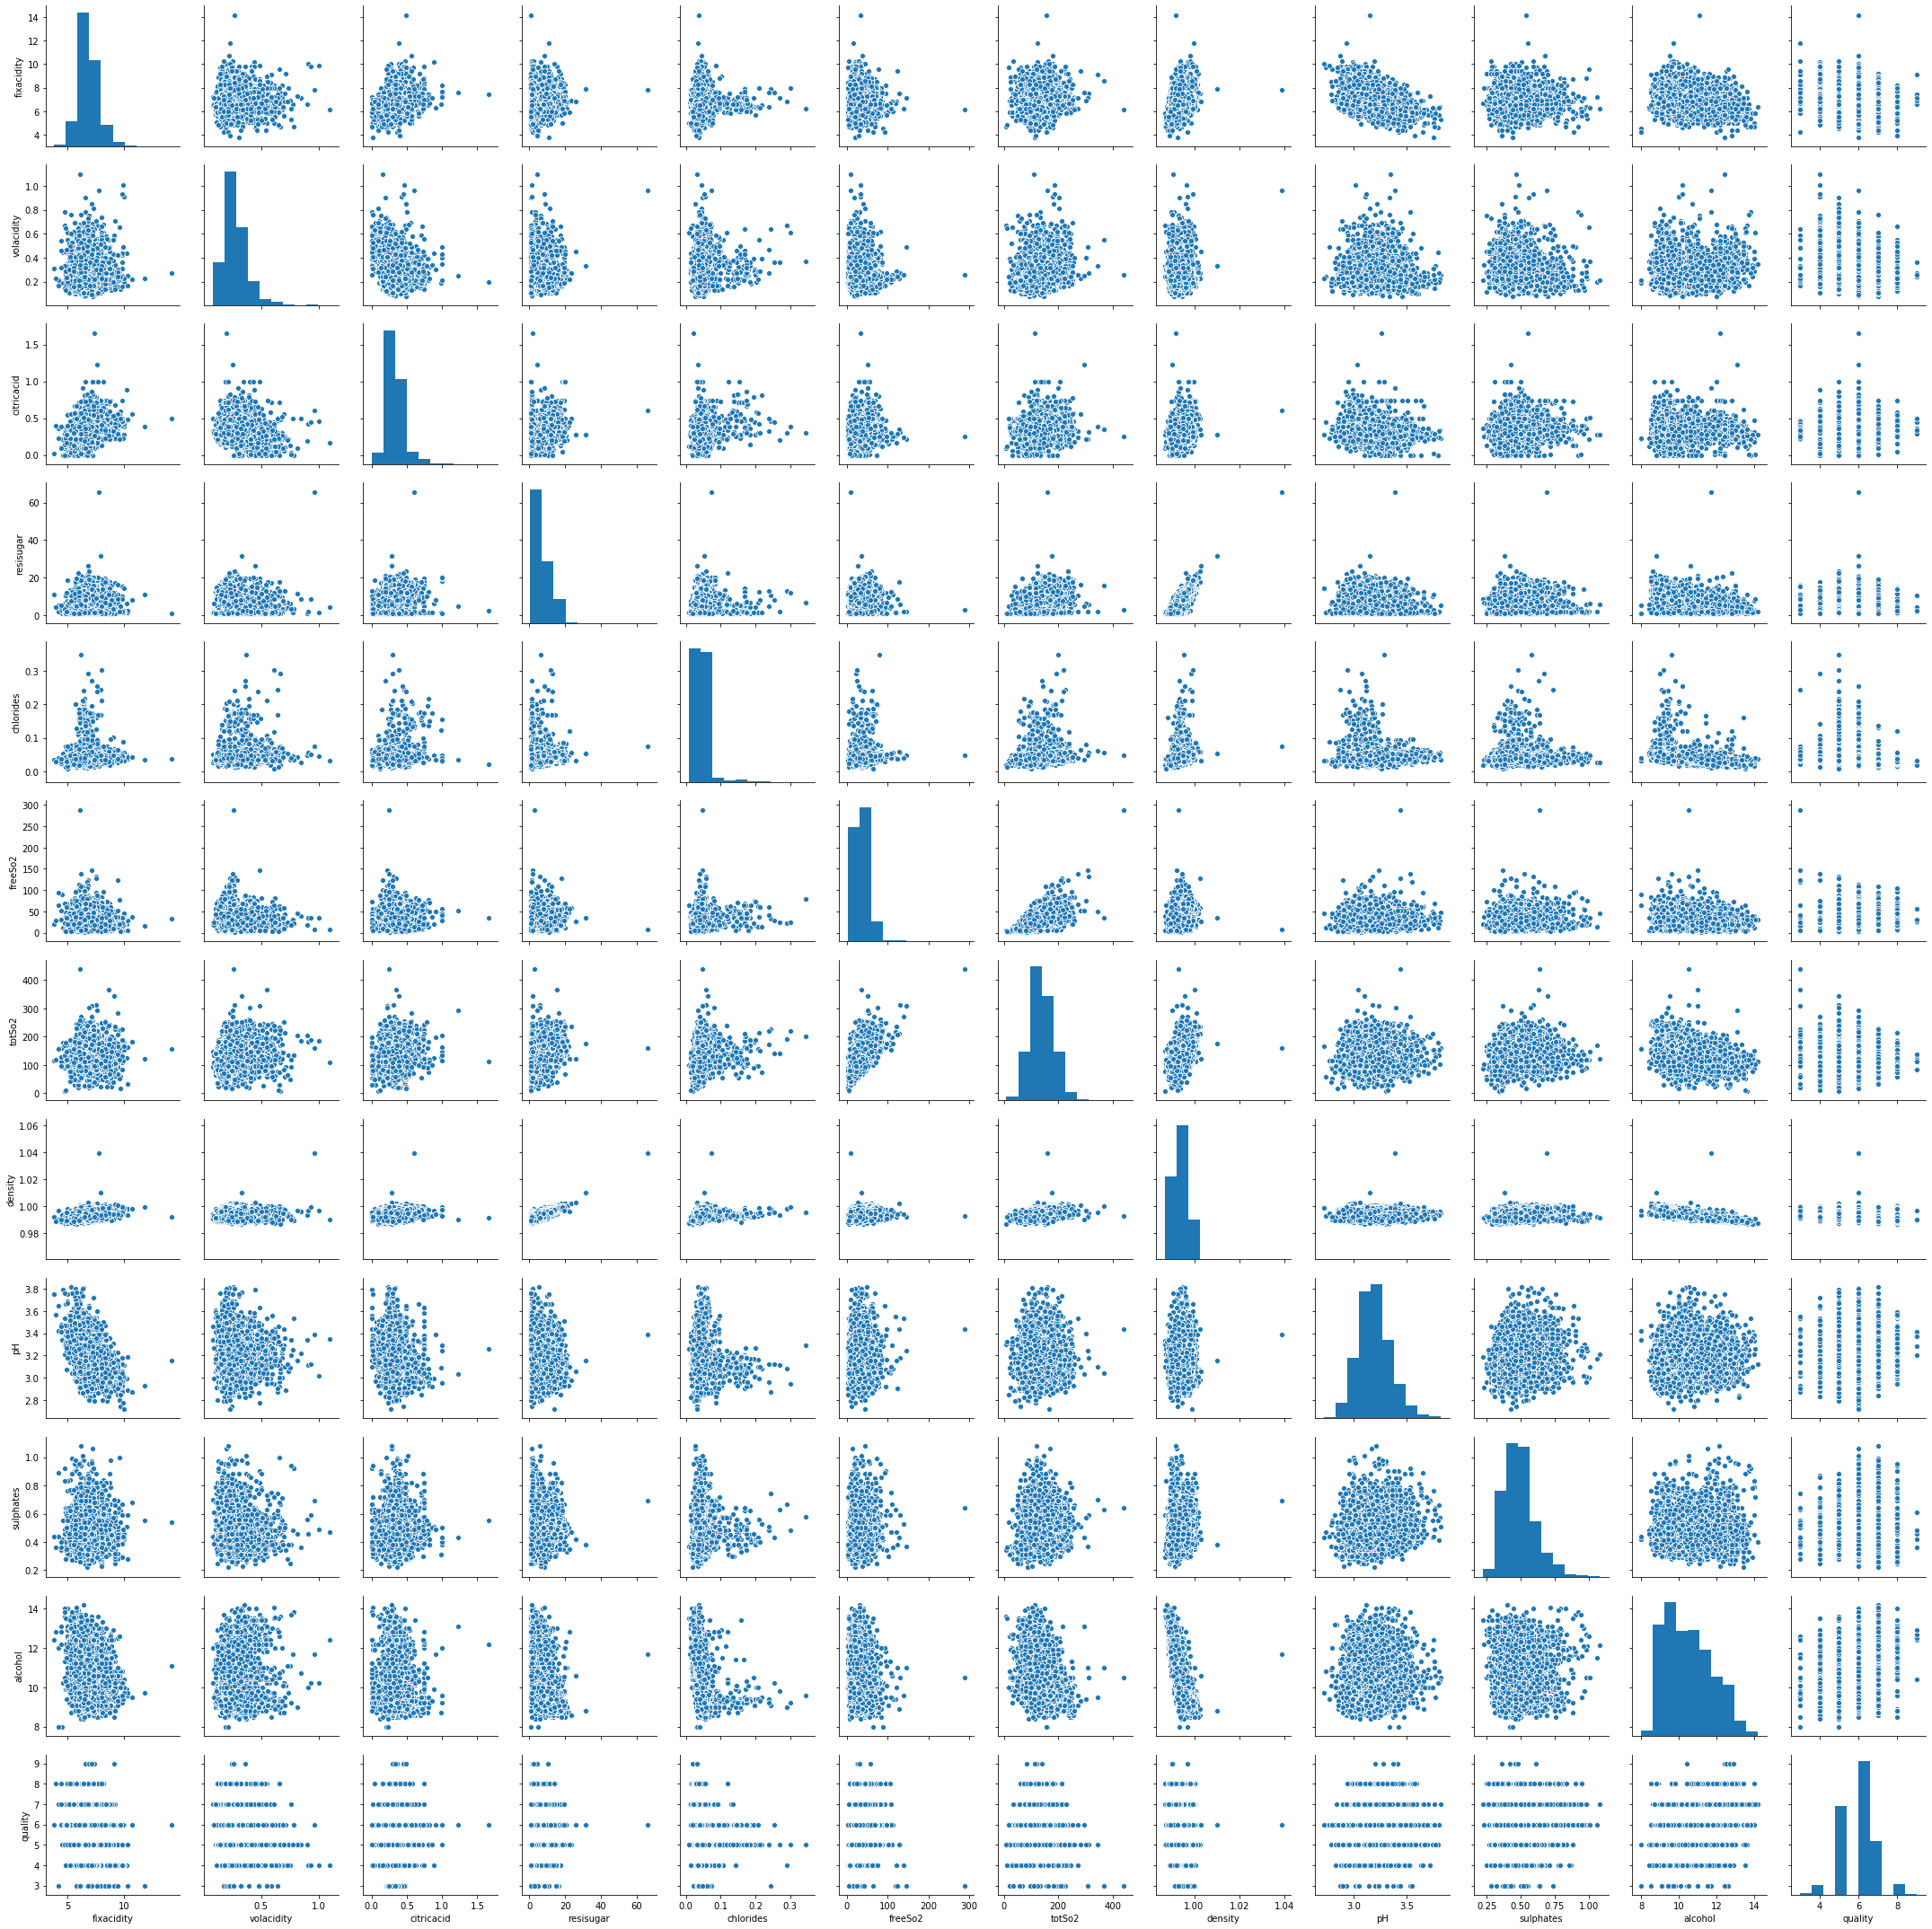

In [92]:
sns.pairplot(df);

## 9. Heatmap of correlation:

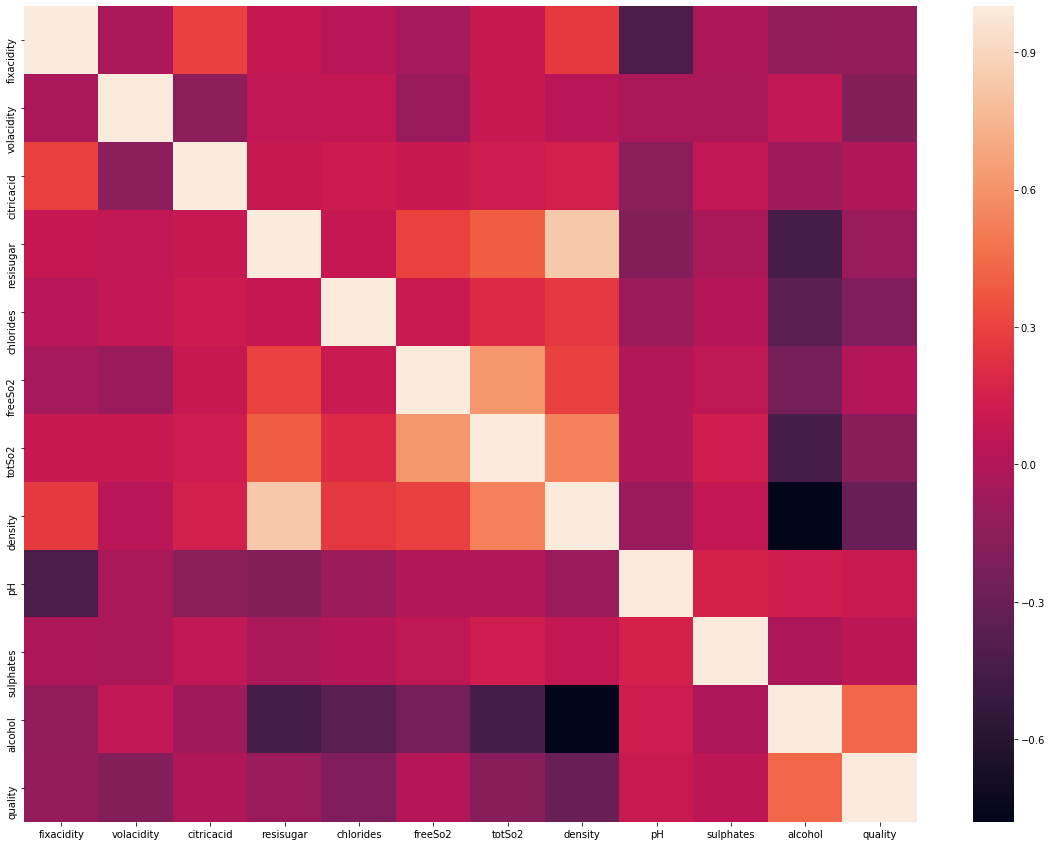

In [97]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr());

## 10. Check the skewness:

In [98]:
df.skew()

fixacidity    0.647751
volacidity    1.576980
citricacid    1.281920
resisugar     1.077094
chlorides     5.023331
freeSo2       1.406745
totSo2        0.390710
density       0.977773
pH            0.457783
sulphates     0.977194
alcohol       0.487342
quality       0.155796
dtype: float64

## 11. Check the distribution of 'quality' column using distplot.

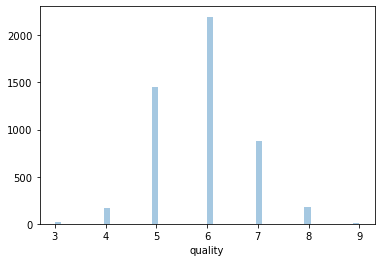

In [100]:
sns.distplot(df.quality, kde=False);

## 12. Make a separate dataframe of all columns except the "quality" column.

In [112]:
df1 = df.drop(['quality'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
fixacidity    4898 non-null float64
volacidity    4898 non-null float64
citricacid    4898 non-null float64
resisugar     4898 non-null float64
chlorides     4898 non-null float64
freeSo2       4898 non-null float64
totSo2        4898 non-null float64
density       4898 non-null float64
pH            4898 non-null float64
sulphates     4898 non-null float64
alcohol       4898 non-null float64
dtypes: float64(11)
memory usage: 421.0 KB


## 13. Apply the feature scaling on the dataframe obtained in above step using StandardScalar():

In [117]:
from sklearn.preprocessing import StandardScaler
stdscl = StandardScaler()

sc = stdscl.fit_transform(df1.values)
dfsc = pd.DataFrame(sc, index=df1.index, columns=df1.columns)
dfsc

,fixacidity,volacidity,citricacid,resisugar,chlorides,freeSo2,totSo2,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
5,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
6,-0.776015,0.414339,-1.439511,0.120000,-0.035355,-0.312141,-0.055553,0.291789,-0.054751,-0.173921,-0.743008
7,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
8,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
9,1.475751,-0.577879,0.791757,-0.964483,-0.081131,-0.429751,-0.220283,-0.076030,0.210175,-0.349184,0.394746
